Ref: https://saezlab.github.io/decoupleR/articles/pw_bk.html#progeny-model

In [1]:
library(decoupleR)
library(dplyr)
library(tibble)
library(tidyr)
library(ggplot2)
library(pheatmap)
library(ggrepel)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
# net_file <- "/users/procardis/zlv560/workspace/__PROGENY/net.human.rds"
net_file <- "/users/procardis/zlv560/workspace/__PROGENY/net.mouse.rds"

# ls -d DE-* | awk -F'-' '{print $2}'
cell.type <- "All_macrophages"
compare.suffix <- "E99K_vs_WT"
mat_file <- sprintf("../DE-%s/DEA.%s/norm.mat.tsv", cell.type, compare.suffix)
top.table_file <- sprintf("../DE-%s/DEA.%s/top.table.%s_all.tsv", cell.type, compare.suffix, compare.suffix)
output_file <- sprintf("output_results-%s.rds", cell.type)

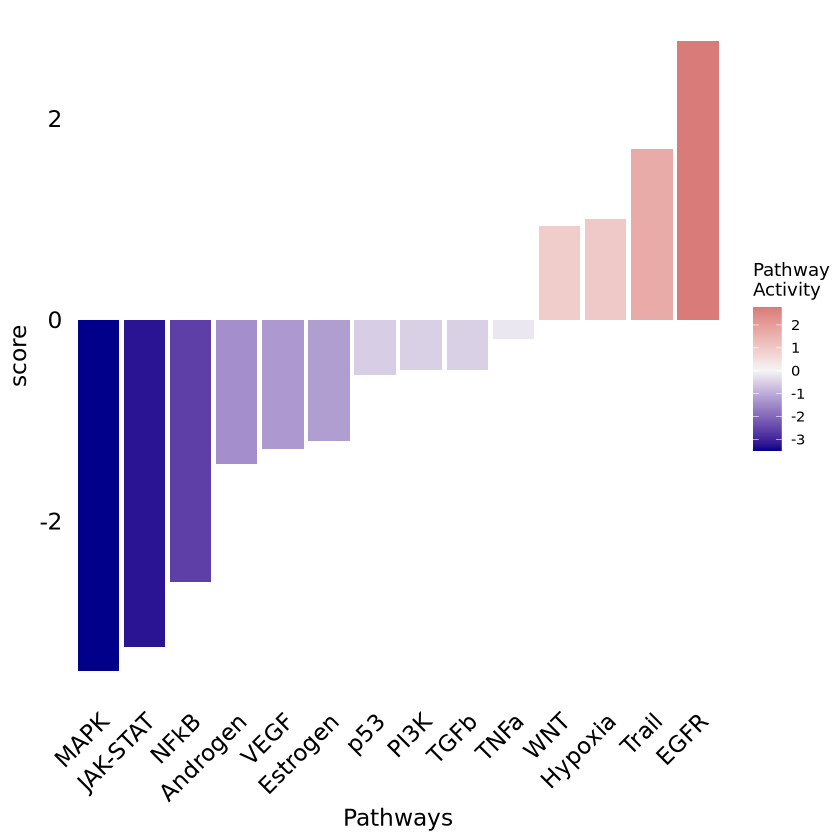

In [8]:
perform_analysis_and_save(net_file = net_file, 
                          mat_file = mat_file, 
                          top.table_file = top.table_file, 
                          output_file = output_file)

output_file <- readRDS(output_file)

# Plot
ggplot(output_file$contrast_acts, aes(x = reorder(source, score), y = score)) + 
    geom_bar(aes(fill = score), stat = "identity") +
    scale_fill_gradient2(low = "darkblue", high = "indianred", 
        mid = "whitesmoke", midpoint = 0) + 
    theme_minimal() +
    theme(axis.title = element_text(size = 14),
        axis.text.x = 
            element_text(angle = 45, hjust = 1, size =14, colour = "black"),
        axis.text.y = element_text(size =14, colour = "black"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank()) +
    xlab("Pathways") +
    labs(fill = "Pathway\nActivity")